# Comparison of the performances of classification models

Build kNN and logistic regression classifiers using sklearn library to predict "satisfaction" (**label** variable) by using given data. 
- First, shuffle and split your data into train, validation and test sets randomly, with a ratio of 70:10:20 **(10 points)**. 
- Build your models (with proper comments and explanations) using training set, and do parameter selection over the validation set  **(45 points)**. 
- Compare these 2 classification models according to their accuracies (you can print accuracy values in a single table as a comprehensive view) over the test set. Comment on their classification performance **(10 points)**.
- Plot confusion matrices for your models over the test set, and comment on the outcomes **(15 points)**. 
- Finally, plot Precision-Recall (PR) curves for each classification model over the test set and evaluate the prediction performance of each classifier **(20 points)**. 

Notes:

* Choose the optimal k value using Minkowski distance (with trying two different p-values) for kNN model using the validation set. 


* For any parameter selection, use the validation set.


* Don't forget to add comments into your code lines to explain how your program works, your intentions behind it. Also, do not forget to comment on the outcomes and comparisons. 

In [78]:
import pandas as pd
import numpy as np
from  sklearn.model_selection import train_test_split 
%matplotlib inline

In [79]:
data_df = pd.read_csv("data.csv")  
print("Number of Rows : ", len(data_df),"\nNumber of Columns : ",len(data_df.columns))
display(data_df.head(5))
##first 5 records

Number of Rows :  1735 
Number of Columns :  23


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [80]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

## Data cleaning and Preprocessing (Encoding ,Handling missing data etc.)

In [81]:
##going to change categorical values to numaric values by encoding 
ord_enc = OrdinalEncoder()
scaler = MinMaxScaler()
##encoding categorical features

data_df[["satisfaction","Customer Type","Gender","Type of Travel","Class"]] = ord_enc.fit_transform(data_df[["satisfaction","Customer Type","Gender","Type of Travel","Class"]])


new_data_df = data_df.interpolate()  ##replacing null values with interpolate method


## new_data_df = pd.DataFrame(scaler.fit_transform(new_data_df),columns=new_data_df.columns)

display(new_data_df.head())  ##encoded data frame
##We have transformed 

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,0.0,0.0,65,1.0,1.0,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,1.0,0.0,47,1.0,0.0,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,0.0,0.0,15,1.0,1.0,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,0.0,0.0,60,1.0,1.0,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,0.0,0.0,70,1.0,1.0,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


####  I USED MINMAX SCALER AT THE FIRST BUT IT GAVE 0 ERROR IN LOG REGRESSION SO I WAS KINDA SUSPECTED THERE COULD BE SOME KIND OF OVERFITTING SO I DECIDED TO NOT USE

In [82]:
y = new_data_df["satisfaction"]  ##selecting features and predictionc columns
x = new_data_df.drop(columns="satisfaction")

In [83]:
X_train, X_test, y_train, y_test  = train_test_split(x, y, test_size=0.2, random_state=21,shuffle=True)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.125, random_state=21,shuffle=True) # 0.25 x 0.8 = 0.2

# Tuning parameters for KNN model

In [84]:
##Going to Tune KNN model by using validation set and training sets

optimal_k = 0
distance = ""  ##just giving default 
manhattan_list = {}
euclid_list = {}
def Elbow(i,k):
    global optimal_k,distance
    
    while(i<=k):
    
        manhattan = KNN(n_neighbors=i,p=1)
        manhattan.fit(X_train,y_train)
        prediction = manhattan.predict(X_val)
        error = mse(y_val,prediction,squared=True)
        manhattan_list[i]=error
    
        euclid = KNN(n_neighbors = i,p=2)
        euclid.fit(X_train,y_train)
        prediction = euclid.predict(X_val)
        error = mse(y_val,prediction,squared=True)
        euclid_list[i]=error
        i +=1;
        
        
    min_error = 10000000
    for key in euclid_list:
        if euclid_list[key]<min_error:
            min_error = euclid_list[key]
            distance = "euclidean"
            optimal_k = key
            
    for key in manhattan_list:
        if manhattan_list[key]<min_error:
            min_error = manhattan_list[key]
            optimal_k = key
            distance = "manhattan"        
   #we found optimal k for manhattan distance knn
                ##now gonna find for euclid


   



In [85]:
Elbow(1,100)
print("Optimal k value for KNN model = {0} \nOptimal Distance Tactic for KNN model = {1}".format(optimal_k,distance))

optimalKnn = KNN(n_neighbors=optimal_k,metric = distance)  ##creating the efficient model of KNN
optimalKnn.fit(X_train,y_train)
knn_predicts = optimalKnn.predict(X_test)
print("Score of Knn model : ",optimalKnn.score(X_test,y_test))

##Now we found the best n_neighbors and metric model for our KNN model. TUNING FINISHED

Optimal k value for KNN model = 3 
Optimal Distance Tactic for KNN model = manhattan
Score of Knn model :  0.8184438040345822


# Tuning parameters for our logistic regression model

In [86]:
##now we need to tune logistic regression parameters using validation and train set

def tuningLog():
    solvers = ['newton-cg', "liblinear",'lbfgs','sag','saga']
    C_vals = [100,10,1,0.1,0.01]
    min_error = 100000
    optimal_vals=["non",0]
    for solv in solvers:
        for c in C_vals:
            
            regress = LogisticRegression(solver=solv,C=c,random_state = 42,max_iter =9000)
            regress.fit(X_train,y_train)
            pred = regress.predict(X_val)
            error = mse(y_val,pred,squared=True)
            if(error<min_error):
                optimal_solver = solv
                min_error = error
                optimal_vals[0] = solv
                optimal_vals[1]=c
            
            
    return optimal_vals
            
optimal_vals = tuningLog()       
print("Optimal solver method for logistic model : ",optimal_vals[0],"\nBest C value : ",optimal_vals[1])

##we found the best solver method for our model

Optimal solver method for logistic model :  newton-cg 
Best C value :  100


In [87]:
##Now we have our optimized parameters for logistic regression we are going to create optimal log reg model

optimal_logreg = LogisticRegression(solver=optimal_vals[0],C=optimal_vals[1],max_iter = 9000)
optimal_logreg.fit(X_train,y_train)

log_predicts = optimal_logreg.predict(X_test)


## AS WE CAN SEE LOGISTIC REGRESSION HAS BETTER ACCURACY SCORE.I think the reason is logistic regression is better for class type predictions. So it is why it has better accuracy score

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from matplotlib import pyplot

# CONFUSSION MATRIXES FOR KNN AND LOGISTIC REGRESSION MODELS

Text(0.5, 1.0, 'KNN Confussion Matrix')

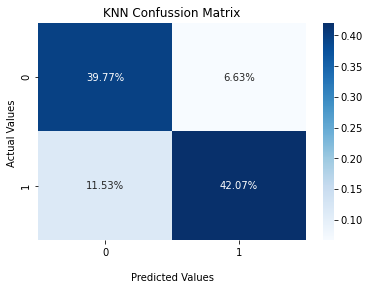

In [89]:
##confussion matrix and graph for KNN

knn_cm = confusion_matrix(y_test,knn_predicts)
ax = sns.heatmap(knn_cm/np.sum(knn_cm), annot=True,  fmt='.2%', cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.set_title("KNN Confussion Matrix")


Text(0.5, 1.0, 'Logistic Regression Confussion Matrix')

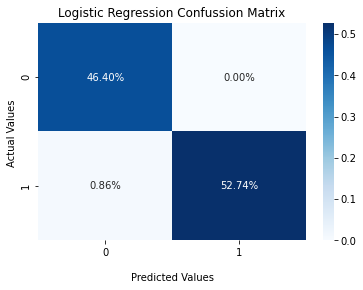

In [90]:
##confussion matrix and graph for logistic regression

log_cm = confusion_matrix(y_test,log_predicts)



ax = sns.heatmap(log_cm/np.sum(log_cm) , annot=True,fmt=".2%", cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.set_title("Logistic Regression Confussion Matrix")              

##WE CAN SEE THAT THERE IS NO SUCH VALUE THAT WE PREDICTED 1 AND TRUTH WAS 0. THIS MEANS OUR MODEL IS BETTER AT PREDICTING 1.
##WHICH MEANS SATISFIED

# PRECISION RECALL CURVE

In [91]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

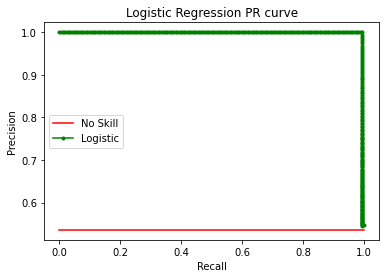

In [92]:


lr_probs = optimal_logreg.predict_proba(X_test)
lr_probs = lr_probs[:, 1]# keep probabilities for the positive outcome only

lr_precision, lr_recall,_ = precision_recall_curve(y_test, lr_probs)



default= len(y_test[y_test==1]) / len(y_test)
##now graphing the precision recall curve

pyplot.plot([0, 1], [default,default], label='No Skill',color = "red")
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic',color="green")

pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title("Logistic Regression PR curve")
pyplot.legend()
pyplot.show()


### Sınce our accuracy in logistic model is close to 1 so its precision recall curve very close to be at perfect point right top corner.

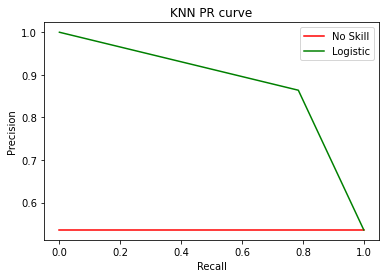

In [93]:

precision,recall,threshhold = precision_recall_curve(y_test,knn_predicts)
pyplot.plot([0, 1], [default,default], label='No Skill',color = "red")
pyplot.plot(recall,precision,label="Logistic",color="green")
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title("KNN PR curve")
pyplot.legend()
pyplot.show()

### As we can see in this graph. Knn model is not so efficient as much as logistic regression

## Now we are comparing models and evaluating performances

In [94]:

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
accuracy_knn =accuracy_score(y_test,knn_predicts)      ##WE ARE CREATING ACCURACY SCORE TABLE FOR BOTH MODEL TO COMPARE
accuracy_log = accuracy_score(y_test,log_predicts)
result = [accuracy_log,accuracy_knn]
models_scores_table = pd.DataFrame(data=result,columns = ["Accuracy Score"],index = ["Logistic Regression","KNN"])
models_scores_table

,Accuracy Score
Logistic Regression,0.991354
KNN,0.818444


### Since Logistic regression is better at predicting binary results. It gives better score. So we better use logistic regression to make our model efficient